In [122]:
import pandas as pd

In [138]:
df = pd.read_csv("./data/marketing_campaign.csv", delimiter="\t")

In [139]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### Get the Clusters (age group - Martial Status - Income - total amount - total number of purachses)

In [140]:
df['age'] = 2021 - df['Year_Birth']

In [141]:
#check the max and min age
print("Min Age", df['age'].min())
print("Max Age", df['age'].max())

Min Age 25
Max Age 128


In [142]:
#create age group buckets
age_group_labels = ['Children', 'Youth','Young Adults', 'Adults', 'Seniors']
age_groups = [0, 1,2, 3, 4]
age_group_bins = [0,15,21,30,65,150]
df['age_group_labels'] = pd.cut(df['age'], bins=age_group_bins, labels=age_group_labels)
df['age_group'] = pd.cut(df['age'], bins=age_group_bins, labels=age_groups)

In [143]:
#create income group buckets
income_group_labels = ["lower","lower_middle","upper_middle","upper"]
income_groups = [0,1,2,3]
df["income_groups_labels"] = pd.qcut(df['Income'], q=4, labels=income_group_labels)
df["income_group"] = pd.qcut(df['Income'], q=4, labels=income_groups)

In [145]:
df["income_group"].value_counts()

3    554
2    554
1    554
0    554
Name: income_group, dtype: int64

In [146]:
df['total_amount'] = df['MntWines'] + df ['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [147]:
#check the min and max of total amount
print("Min Total", df['total_amount'].min())
print("Max Total", df['total_amount'].max())

Min Total 5
Max Total 2525


In [148]:
#create Total amount Buckets
purchase_amount_bucket_labels = ['low_buyers', 'lower_medium_buyers','medium_buyers','high_buyers']
purchase_amounts = [0, 1,2,3]
purchase_amount_buckets = [0,50,300,700,2600]
df['spend_group_labels'] = pd.cut(df['total_amount'], bins=purchase_amount_buckets, labels=purchase_amount_bucket_labels)
df['spend_group'] = pd.cut(df['total_amount'], bins=purchase_amount_buckets, labels=purchase_amounts)

In [149]:
df.Marital_Status = df.Marital_Status.replace({"Absurd":0, "Alone":1,"Divorced":2,"Married":3, "Single":4, "Together":5, "Widow":6, "YOLO":7})

In [150]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'age', 'age_group_labels', 'age_group', 'income_groups_labels',
       'income_group', 'total_amount', 'spend_group_labels', 'spend_group'],
      dtype='object')

In [210]:

X = df[["Marital_Status", "Income", "age", "total_amount"]]
X = X.fillna(X.mean())
X = X.values

In [211]:
from sklearn.cluster import KMeans

In [212]:
cluster_number = 4
k_means = KMeans(init="k-means++", n_clusters = cluster_number, n_init=12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 0 3 ... 0 3 0]


In [213]:
df["Clusters"] = labels

In [214]:
df.groupby("Clusters").mean()

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,total_amount
Clusters,,,,,,,,,,,,,,,,,,,,,
0,5384.675277,1966.040590,3.741697,52358.688213,0.414514,0.815498,49.757688,289.343173,18.950800,100.656827,...,0.087331,0.006150,0.020910,0.014760,0.004920,3.0,11.0,0.108241,54.959410,498.047970
1,5661.447903,1973.112314,3.703654,28315.736130,0.809202,0.311231,48.516915,30.316644,6.006766,25.608931,...,0.004060,0.000000,0.001353,0.000000,0.016238,3.0,11.0,0.115020,47.887686,94.855210
2,9432.000000,1977.000000,5.000000,666666.000000,1.000000,0.000000,23.000000,9.000000,14.000000,18.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,44.000000,62.000000
3,5757.576419,1967.433770,3.742358,76967.844250,0.085881,0.350801,49.017467,615.963610,56.851528,397.657933,...,0.135371,0.229985,0.183406,0.026201,0.007278,3.0,11.0,0.234352,53.566230,1283.719068


In [215]:
import matplotlib.pyplot as plt
import numpy as np

## Income VS Total Spend
### From the below graph it is very clear that people with less income is buying is very less and peple with medium and high income are the potential & big buyers.

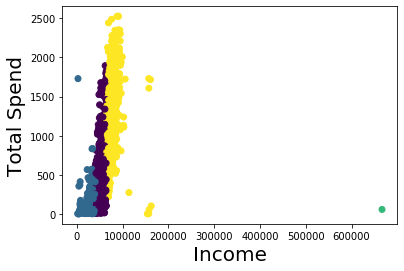

In [216]:
plt.scatter(X[:,1],X[:,3], c=labels.astype(np.float))
plt.xlabel("Income", fontsize="20")
plt.ylabel("Total Spend", fontsize="20")
plt.show()

## Age vs Total Spend
### From the below graph it is very clear that age doesn't have any replationship with the total spends. We can clearly say that all the age group have low, medium and big buyers are there.

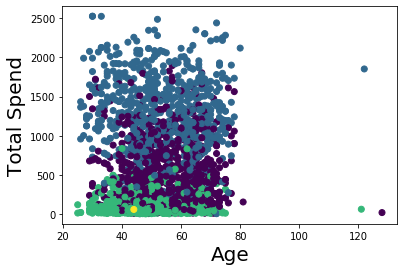

In [201]:
plt.scatter(X[:,2],X[:,3], c=labels.astype(np.float))
plt.xlabel("Age", fontsize="20")
plt.ylabel("Total Spend", fontsize="20")
plt.show()

## Martial Status VS Total Spend
### From the below group we can say that people with martial  status Absurd, Alone &  Yolo are not potential buyers and people with martial status Divorced, Married, Single, Together, Widow are the potential buyers.

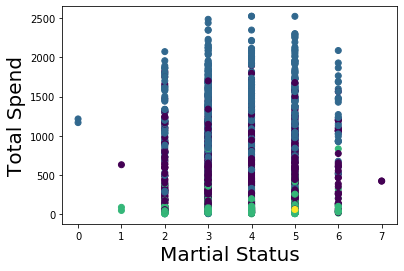

In [202]:
plt.scatter(X[:,0],X[:,3], c=labels.astype(np.float))
plt.xlabel("Martial Status", fontsize="20")
plt.ylabel("Total Spend", fontsize="20")
plt.show()